# Computational Neuroscience <br> Problem Set 2. Neural Network

PSYC B265, Fall 2025

**Due: November 5, 2025 Wednesday at 11:39 am**

Before we start, we'll run a magic command to ensure `matplotlib` graphics are displayed inline, and then import some core packages.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_context("notebook")

## Exercise 1. Linear Separability

### XOR

We want the final output $y$ to be active when either one of the two inputs ($x_1$ or $x_2$) is true, but not when both are true or both are false. This is called exclusive OR (XOR), and the logic is expressed in the truth table below.

| input $x_1$ | input $x_2$ | output $y$ |
|---|---|---|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

As learned in class, this problem is not linearly separable. To solve this, we will make use of $z_1$ and $z_2$ as the hidden units between inputs $x_1$ and $x_2$ and the output $y$ as the following:

| input $x_1$ | input $x_2$ | hidden $z_1$ | hidden $z_2$ | output $y$ |
|---|---|---|---|---|
| 0 | 0 | 0 | 0 | 0 |
| 0 | 1 | 0 | 1 | 1 |
| 1 | 0 | 1 | 0 | 1 |
| 1 | 1 | 0 | 0 | 0 |

In [2]:
# inputs
x = np.array([
    [0,0], # both inputs are false
    [0,1], # x1 is false; x2 is true
    [1,0], # x1 is true; x2 is false
    [1,1]  # both inputs are true
])
print(f'inputs:\n {x}')

# expected outputs
z = np.array([
    [0,0], # z1 is false, z2 is false
    [0,1], # z1 is false, z2 is true
    [1,0], # z1 is true, z2 is false
    [0,0]  # z1 is false, z2 is false
])
print(f'expected outputs z1 and z2:\n {z}')

y = np.array([
    [0],
    [1],
    [1],
    [0]
])

# create a dataframe for plotting
df = pd.DataFrame(np.hstack((x, z, y)), columns=['x1', 'x2', 'z1', 'z2', 'y']) # combine x, z, and y
df

inputs:
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
expected outputs z1 and z2:
 [[0 0]
 [0 1]
 [1 0]
 [0 0]]


,x1,x2,z1,z2,y
0,0,0,0,0,0
1,0,1,0,1,1
2,1,0,1,0,1
3,1,1,0,0,0


#### TODO (6 pts):
In the cell below, **fill in the weights `w_xz` and the threshold `th_z` that will correctly implement $z_1$ and $z_2$**, given the following constraints:

- The weights between the input layer $x$ and output layer $z$ `w_xz`, can take values from the set $\{-1, 1\}$.
- The threshold `th_z` must be an integer (e.g., -2, -1, 0, 1, 2),

**For each weight vector in `w_xz`, add a comment** to indicate:
  - Which output ($z_1$ or $z_2$) the weight vector is associated with.
  - Whether the connection from each input ($x_1$ and $x_2$) is excitatory or inhibitory.

In [3]:
# weights

w_xz = np.array([
    [1, -1], # weight vector associated with z1. Excitatory to x1, inhibitory to x2
    [-1, 1], # weight vector associated with z2. inhibitory to x1, excitatory to x2
    ])
print(f'weights: \n {w_xz}')

# threshold th
th_z = [
[1]
    ]
print(f'threshold: {th_z}')
# threshold is 1 because we only want neuron to fire when ONLY one of x1 or x2 fires.

print(F"dot products: \n {x @ w_xz.T}") # check dot product to figure out what to set as threshold

# compute the predicted outputs zhat based on the weights and threshold values
zhat = np.zeros([4,2])
for i in range(2):
    zhat[:,i] = np.where(np.dot(x, w_xz[i,:]) >= th_z, 1, 0)
print(f'outputs: \n{zhat}')

# add them to the data frame df
df[['zhat1','zhat2']] = zhat
df

weights: 
 [[ 1 -1]
 [-1  1]]
threshold: [[1]]
dot products: 
 [[ 0  0]
 [-1  1]
 [ 1 -1]
 [ 0  0]]
outputs: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [0. 0.]]


,x1,x2,z1,z2,y,zhat1,zhat2
0,0,0,0,0,0,0.0,0.0
1,0,1,0,1,1,0.0,1.0
2,1,0,1,0,1,1.0,0.0
3,1,1,0,0,0,0.0,0.0


#### TODO (4 pts): 
Explain the purpose of the following line of code in the context of the cell above. Make sure to provide explanations in terms of (1) input arguments and return value for each function used, and (2) neural computation and learning based on sensory stimuli.

```python
zhat[:,i] = np.where(np.dot(x, w_xz[i,:]) >= th_z, 1, 0)
```
> This line of code fills in values for our table of zhat. After we initialize an empty array the same shape as zhat1 and zhat2, this line within the for loop fills in each column of the zhat array based on the provided threshold and weights. By part:
1. ```zhat[:,i]``` grabs the ith column of the matrix. We repeated the loop 2 times, so it will fill in 2 columns (one for zhat1, one for zhat2). Each column corresponds to one of the output neurons.
2. ```np.where(1, 2, 3)``` is a conditional statement. It inputs (1) the condition to be checked, (2), what to do if condition is satisfied, and (3) what to do if condition isn't satisfied. In this case, the condition we're checking is that np.dot(x, w_xz[i,:]) >= thz; that is, that the dot product of x and the weight vectors is equal to or above the given threshold. np.where() returns the values given in (2) and (3), depending on whether (1) is satisfied. Biologically, this corresponds to the firing of the output neuron. Neurons either fire or don't - they don't partially fire. If condition (1) is met (that is, if the stimulus from the input neurons is above the firing threshold), the output neuron will fire. Otherwise, it will not. 
3. ```np.dot(vector1, vector2)``` is a function that calculates the dot product of vector 1 and vector 2. The first vector is the input arguments (x1 and x2) while the second vector is the weight vector. Note that in the weight vector, we only look at the ith row (since we're only looking at the ith column of zhat). The dot product of the input neuron and the weight neuron corresponds to the weighted sum of the sensory stimulus and synaptic strength. This weighted sum, if above the firing threshold, causes the output neuron to fire.

##### Plot predicted outputs by running the cell below.

Your output should look like this:

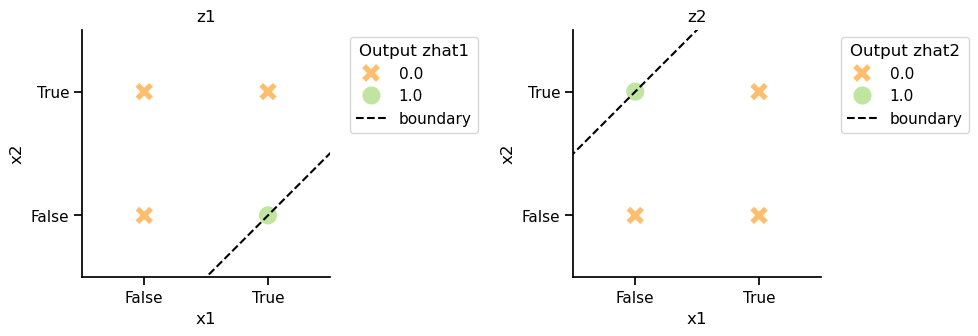

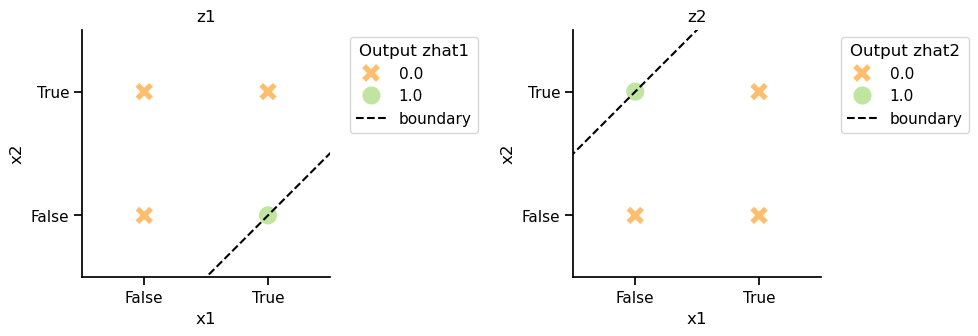

In [4]:
# plot predicted zhat1 and zhat2
fig, axes = plt.subplots(1, 2, figsize=(10, 20))

for i in range(2):
    sns.scatterplot(
        data=df,
        x='x1',
        y='x2',
        hue=f'zhat{i+1}',
        palette='Spectral',
        style=f'zhat{i+1}',
        markers=['X', 'o'],
        s=200,
        ax=axes[i]  # for subplotting
    )

    # draw a line for the decision boundary on each subplot
    xs = np.linspace(-2.1, 2.1, 100)
    axes[i].plot(xs, (-w_xz[i, 0] * xs + th_z[0]) / w_xz[i, 1], 'k--', label='boundary')

    # remove the top and right spines
    sns.despine(ax=axes[i])

    # set square aspect ratio
    axes[i].set_aspect('equal', adjustable='box')

    # tick labels
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['False', 'True'])
    axes[i].set_yticks([0, 1])
    axes[i].set_yticklabels(['False', 'True'])

    # set limits
    axes[i].set_xlim([-0.5, 1.5])
    axes[i].set_ylim([-0.5, 1.5])

    # add legend
    axes[i].legend(title=f'Output zhat{i+1}', bbox_to_anchor=(1.05, 1), loc='upper left')

    # add a title for each subplot
    axes[i].set_title(f'z{i+1}')

plt.tight_layout()  # adjust the layout so plots don't overlap
plt.show()

#### TODO (2 pts):
In the cell below, **fill in the weights `w_zy` and the threshold `th_y` that will correctly implement $y$**, given the following constraints:

- The weights between the hidden layer $z$ and output layer $y$ `w_zy`, can take values from the set $\{-1, 1\}$.
- The threshold `th_y` must be an integer (e.g., -2, -1, 0, 1, 2),

**For the weight vector in `w_zy`, add a comment** to indicate:
  - Whether the connection from each input ($z_1$ and $z_2$) is excitatory or inhibitory.

In [5]:
# There is an AND gate between zhat 1, zhat2 and y
# weights
w_zy = np.array([
    [1, 1], # excitatory for zhat1 and zhat2
    ])
print(f'weights: {w_zy}')

# threshold th
th_y = [
   [1] # this way, both zhat1 and zhat2 are activated to produce y
]
print(f'threshold: {th_y}')

# compute the predicted outputs zhat based on the weights and threshold values
yhat = np.zeros([4,1])
for i in range(1):
  yhat[:,i] = np.where(np.dot(zhat, w_zy[i,:]) >= th_y[i], 1, 0)
print(f'outputs: \n {yhat}') # matches what we want with XOR gate

# add the column to the data frame df
df[['yhat']] = yhat
df

weights: [[1 1]]
threshold: [[1]]
outputs: 
 [[0.]
 [1.]
 [1.]
 [0.]]


,x1,x2,z1,z2,y,zhat1,zhat2,yhat
0,0,0,0,0,0,0.0,0.0,0.0
1,0,1,0,1,1,0.0,1.0,1.0
2,1,0,1,0,1,1.0,0.0,1.0
3,1,1,0,0,0,0.0,0.0,0.0


##### Plot predicted outputs by running the cell below.

Your output should look like this:
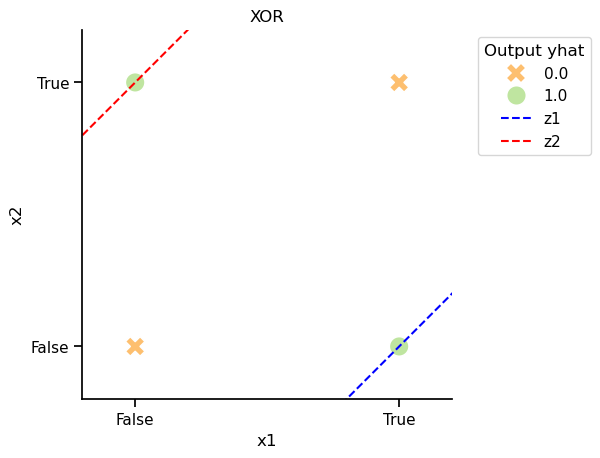

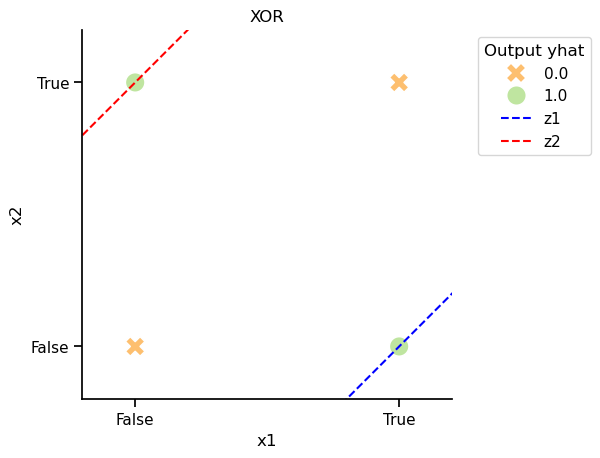

In [6]:
# plot predicted output yhat
sns.scatterplot(data=df, x='x1', y='x2', hue='yhat', palette='Spectral', style='yhat', markers=['X', 'o'], s=200)

# draw a line for the decision boundary
xs = np.linspace(-0.2, 2.2, 100)
plt.plot(xs, (- w_xz[0,0] * xs + th_z[0]) / w_xz[0,1], 'b--', label='z1')
plt.plot(xs, (- w_xz[1,0] * xs + th_z[0]) / w_xz[1,1], 'r--', label='z2')

# remove the top and right spines
sns.despine()

# set square aspect ratio
plt.gca().set_aspect('equal', adjustable='box')

# tick labels
plt.xticks([0, 1], ['False', 'True'])
plt.yticks([0, 1], ['False', 'True'])

# set limits
plt.xlim([-0.2, 1.2])
plt.ylim([-0.2, 1.2])

# add legend
plt.legend(title='Output yhat', bbox_to_anchor=(1.05, 1), loc='upper left')

# title
plt.title('XOR')

plt.show()

### XNOR

#### TODO (6 pts):
Using the logic above, now you want to recognize cats by putting McCulloch-Pitts neurons together. The logic is that animals like cats have vertical pupils when it's bright, but their pupils become rounder when it's dark/ low-light.

Your final output figure should look like this

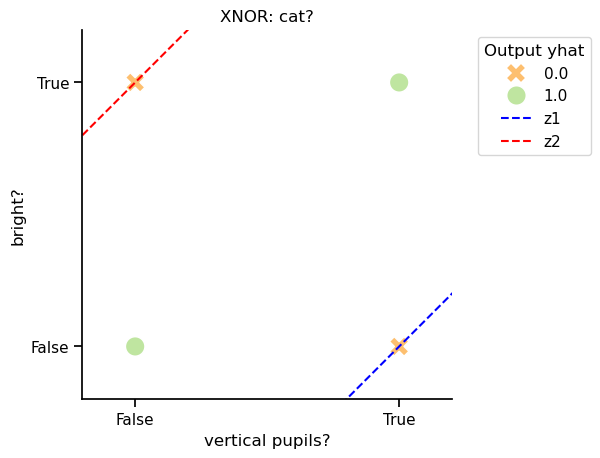

inputs:
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
expected outputs z1 and z2:
 [[0 0]
 [0 1]
 [1 0]
 [0 0]]
weights: 
 [[ 1 -1]
 [-1  1]]
threshold: [[1], [1]]
dot products: 
 [[ 0  0]
 [-1  1]
 [ 1 -1]
 [ 0  0]]
outputs: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [0. 0.]]
weights: 
 [[-1 -1]]
threshold: [[0]]
outputs: 
 [[1.]
 [0.]
 [0.]
 [1.]]
   x1  x2  z1  z2  y  zhat1  zhat2  yhat
0   0   0   0   0  1    0.0    0.0   1.0
1   0   1   0   1  0    0.0    1.0   0.0
2   1   0   1   0  0    1.0    0.0   0.0
3   1   1   0   0  1    0.0    0.0   1.0


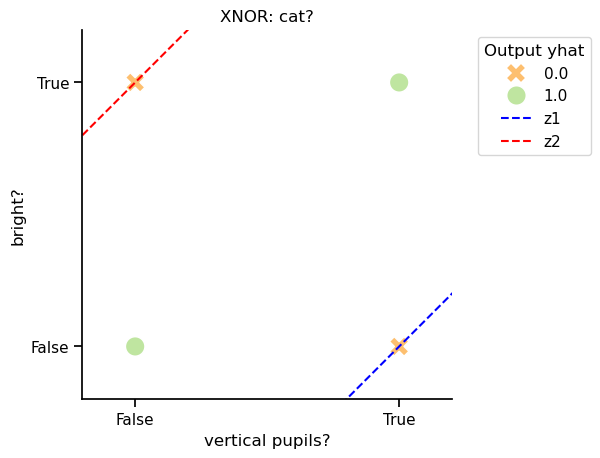

In [7]:
# We need the neuron to fire when NEITHER input neurons fire, or when BOTH fire

# inputs
x = np.array([
    [0,0], # both inputs are false
    [0,1], # x1 is false; x2 is true
    [1,0], # x1 is true; x2 is false
    [1,1]  # both inputs are true
])
print(f'inputs:\n {x}')

# expected outputs
z = np.array([
    [0,0], # z1 is false, z2 is false
    [0,1], # z1 is false, z2 is true
    [1,0], # z1 is true, z2 is false
    [0,0]  # z1 is false, z2 is false
])
print(f'expected outputs z1 and z2:\n {z}')

y = np.array([
    [1],
    [0],
    [0],
    [1]
])

# create a dataframe for plotting
df = pd.DataFrame(np.hstack((x, z, y)), columns=['x1', 'x2', 'z1', 'z2', 'y']) # combine x, z, and y
df

# weights between x and z
w_xz = np.array([
    [1, -1], # weight vector associated with z1. Excitatory to x1, inhibitory to x2
    [-1, 1], # weight vector associated with z2. inhibitory to x1, excitatory to x2
    ])
print(f'weights: \n {w_xz}')

# threshold th
th_z = [
[1],[1]
    ]
print(f'threshold: {th_z}')
# threshold is 1 because we only want neuron to fire when ONLY one of x1 or x2 fires.

print(F"dot products: \n {x @ w_xz.T}") # check dot product to figure out what to set as threshold

# compute the predicted outputs zhat based on the weights and threshold values
zhat = np.zeros([4,2])
for i in range(2):
    zhat[:,i] = np.where(np.dot(x, w_xz[i,:]) >= th_z[i], 1, 0)
print(f'outputs: \n{zhat}')

# add them to the data frame df
df[['zhat1','zhat2']] = zhat

# weights for zhat to y
w_zy = np.array([
    [-1, -1], # need to fire when NEITHER zhat1 or zhat2 is firing (NOR gate)
    ])
print(f'weights: \n {w_zy}')

# threshold th
th_y = [
   [0] # this way, if neither zhat1 or zhat2 fire, then yhat fires
]
print(f'threshold: {th_y}')

# compute the predicted outputs zhat based on the weights and threshold values
yhat = np.zeros([4,1])
for i in range(1):
  yhat[:,i] = np.where(np.dot(zhat, w_zy[i,:]) >= th_y[i], 1, 0)
print(f'outputs: \n {yhat}') # matches what we want with XOR gate

# add the column to the data frame df
df[['yhat']] = yhat
print(df)

## plotting

# plot predicted output yhat
sns.scatterplot(data=df, x='x1', y='x2', hue='yhat', palette='Spectral', style='yhat', markers=['X', 'o'], s=200)

# draw a line for the decision boundary
xs = np.linspace(-0.2, 2.2, 100)
plt.plot(xs, (- w_xz[0,0] * xs + th_z[0]) / w_xz[0,1], 'b--', label='z1')
plt.plot(xs, (- w_xz[1,0] * xs + th_z[1]) / w_xz[1,1], 'r--', label='z2')

# remove the top and right spines
sns.despine()

# set square aspect ratio
plt.gca().set_aspect('equal', adjustable='box')

# tick labels
plt.xticks([0, 1], ['False', 'True'])
plt.yticks([0, 1], ['False', 'True'])

# set limits
plt.xlim([-0.2, 1.2])
plt.ylim([-0.2, 1.2])

# add legend
plt.legend(title='Output yhat', bbox_to_anchor=(1.05, 1), loc='upper left')

# title
plt.title('XNOR: cat?')

# axis labels
plt.xlabel('vertical pupils?')
plt.ylabel('bright?')

plt.show()

#### TODO (6 pts): 
Considering the XOR and XNOR problems you solved above, discuss how a biological neural network can categorize cats vs. dogs in the following scenarios.

If the output neuron only receives inputs from "furriness" detector neurons and "vertical pupils" detector neurons, can this neuron recognize cats in all situations? When would it be successful and when would it be unsuccessful?

In addition, discuss if the output neuron can solve the problem if we add a "brightness" detector input feature. What else do we need?

> **If the output neuron receives inputs from furriness and vertical pupil detector neurons, it will only be able to recognize cats when it is bright outside, since cats only have vertical pupils in bright lighting. Cats in dark lighting have round pupils, so the neural network would classify a cat with round pupils incorrectly. It also wouldn't successfully classify bald cats as they do not have fur, but are still cats. Similarly, a bald cat with round pupils would be incorrectly classified. This neural network would be successful in classifying furry cats in bright lighting.**
> 
> **The output neuron would be more successful solving the problem with a "brightness" detector as it would be able to classify cats with round pupils in dark lighting. However, it would incorrectly classify a dog in dark lighting as a cat, since it is furry and does not have vertical pupils. It would also continue to incorrectly classify bald cats as they do not have fur. To correctly solve the problem, some other neurons encoding "head shape" (cats and dogs have distinct head shapes) or other factors (paw size, body size, meowing vs. barking, etc.) might be necessary to fully classify a cat vs. dog.**

## Exercise 2. MLP

As in **Lab 5**, we will use the famous MNIST (Modified National Institute of Standards and Technology) database that has driven a lot of developments in deep learning. The data set consists of digitized examples of hand-written numbers from 0 to 9. Each image consists of 28*28 pixels.

In [8]:
import tensorflow as tf
from keras import models, layers, optimizers, datasets, utils

#### TODO (6 pts): Preprocession

Load data from MNIST dataset and divide it into two sets: train and test. Train data will be used to update the weights, and test data will be set aside to evaluate the model after all training is done. Each set has input (`x`) and output (`y`).

Rescale the 256 bits grayscale input images so the maximum value is 1.

Gather all the pixels in the image into a 1-dimensional vector so the model to process each pixel as an input feature (i.e., one input neuron will process one pixel of the image).

Change the labels into a 1-hot representation which is vector of length equal to the number of classes with zeros in all components except the position that indicates the label of this class. For example, with three classes we could have 1 → [1, 0, 0], 2 → [0, 1, 0], 3 → [0, 0, 1]. We can use the Keras function `utils.to_categorical` for this purpose.

```python
# load train and test data for mnist dataset.
# train data will be used to update the weights,
# and test data will be set aside to evaluate the model after all training is done.
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# normalize the 256-bit grayscale input images so the maximum value is 1
# to make training more stable and efficient by ensuring all inputs are on a similar scale
x_train = ...
x_test = ...

# outputs have 10 categories; represent them as 10 binary output units
y_bin_train = ...
y_bin_test = ...

# reshaping the 28x28 pixel grid into a 1D vector of 784 features
x_train = ...
x_test = ...
```

In [18]:
# add your code

# load train and test data for mnist dataset.
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# train data will be used to update the weights,
# and test data will be set aside to evaluate the model after all training is done.

# normalize the 256-bit grayscale input images so the maximum value is 1
# to make training more stable and efficient by ensuring all inputs are on a similar scale
x_train = x_train / 256
x_test = x_test / 256

# outputs have 10 categories; represent them as 10 binary output units
y_bin_train = utils.to_categorical(y_train, 10)
y_bin_test = utils.to_categorical(y_test, 10)

# reshaping vector to pixel grid
x_train_reshaped = x_train.reshape(60000, 28*28)
x_test_reshaped = x_test.reshape(10000, 28*28)


#### TODO (8 pts): Configuration

Configure a feedforward neural network with 3 layers in total, including 2 hidden layers. The first hidden layer should have 128 hidden units and the second hidden layer should have 32 hidden units. All layers are fully connected.

Use rectified linear unit (reLU) activation function for hidden layers. The output layer should use softmax activation function.

Compile the model with the following parameters:

- optimizer: 'nadam'
- loss function: 'categorical_crossentropy'
- metric: 'accuracy'

Fit the model with the training data (the vectorized pixels and the labels), use the following parameters:
* batch size: 256
* epochs: 50
* validation split: 0.1

Immediately before the `fit` function, set random seed as 123 for reproducibility using `tensorflow`.

```python

# set up input layer 'inputs'
# set the input shape to match the flattened image size
inputs = ..

# set up hidden layers
hidden1 = ...
...

# use an appropriate number of units for this classification task.
# use a softmax activation function to classify the digits.
# connect it fully to the last hidden layer.
outputs = ...

# create the neural network model with input and output layers
# by connecting the 'inputs' and 'outputs' layers that are set above.
model = ...

# configure how to train the classifier:
# specify the optimizer, loss function, and performance metrics
...

# set random seed for reproducibility
...

# fit the model and store the history in the variable 'history'
history = ...
                    
```

In [19]:
# set up input layer 'inputs' (layer 1)
# set the input shape to match the flattened image size
inputs = layers.Input(shape = (784,))

# set up the hidden layers (2 hidden layers)
# using .Dense because all layers are fully connected
hidden1 = layers.Dense(128, activation='relu')(inputs) 
hidden2 = layers.Dense(32, activation='relu')(hidden1)

# use a softmax activation function to classify the digits.
# connect it fully to the last hidden layer.
outputs = layers.Dense(10, activation='softmax')(hidden2)

# create the neural network model with input and output layers
# by connecting the 'inputs' and 'outputs' layers that are set above.
model = models.Model(inputs=inputs, outputs=outputs)

# configure how to train the classifier:
# specify the optimizer, loss function, and performance metrics
model.compile(optimizer='Nadam',
              loss='categorical_crossentropy', metrics=['accuracy'])

# set random seed for reproducibility
tf.random.set_seed(123)

# fit the model and store the history in the variable 'history'
history = model.fit(x_train_reshaped, y_bin_train,
                    batch_size=256, epochs=50,
                    validation_split=0.1)
                    

Epoch 1/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8745 - loss: 0.4793 - val_accuracy: 0.9527 - val_loss: 0.1756
Epoch 2/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9470 - loss: 0.1837 - val_accuracy: 0.9652 - val_loss: 0.1279
Epoch 3/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9610 - loss: 0.1324 - val_accuracy: 0.9705 - val_loss: 0.1067
Epoch 4/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9700 - loss: 0.1029 - val_accuracy: 0.9717 - val_loss: 0.0960
Epoch 5/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9761 - loss: 0.0834 - val_accuracy: 0.9738 - val_loss: 0.0898
Epoch 6/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9805 - loss: 0.0692 - val_accuracy: 0.9752 - val_loss: 0.0856
Epoch 7/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9839 - loss: 0.0583 - val_accuracy: 0.9762 - val_loss: 0.0828
Epoch 8/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9867 - loss: 0.0493 - val_accuracy: 0.

#### TODO (4 pts): Evaluation

Evaluate model with test data using the `evaluate` method.

Plot accuracy as a function of epoch for training and validation sets. Label axis appropriately, and include legend.

```python

# evaluate with test set
score = model.evaluate(..., ...)
print(f'test set loss: {score[0]} accuracy: {score[1]}')

# plot the accuracy over training epochs (iterations)
plt.plot(... , label= ...)
plt.plot(... , label= ...)
plt.title('model accuracy over epochs')
plt.legend(loc='lower right')

plt.xlabel('ADD YOUR AXIS LABEL')
plt.ylabel('ADD YOUR AXIS LABEL')

plt.show()

# plot the loss (error) over training epochs (iterations)
plt.plot(... , label= ...)
plt.plot(... , label= ...)
plt.title('model accuracy over epochs')
plt.legend(loc='lower right')

plt.xlabel('ADD YOUR AXIS LABEL')
plt.ylabel('ADD YOUR AXIS LABEL')

plt.show()
```


In [20]:
# evaluate with test set
score = model.evaluate(x_test_reshaped, y_bin_test)
print(f'test set loss: {score[0]:0.2f} accuracy: {score[1]*100:0.2f}%')


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9788 - loss: 0.1348
test set loss: 0.13 accuracy: 97.88%


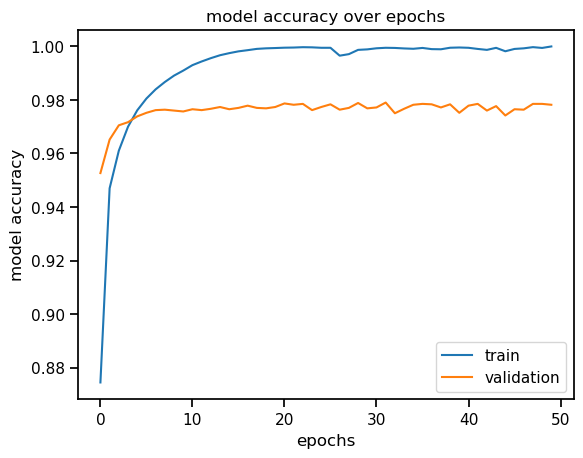

In [21]:
# plot the accuracy over training epochs (iterations)

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'] , label= 'validation')
plt.title('model accuracy over epochs')
plt.legend(loc='lower right')

plt.xlabel('epochs')
plt.ylabel('model accuracy')

plt.show()

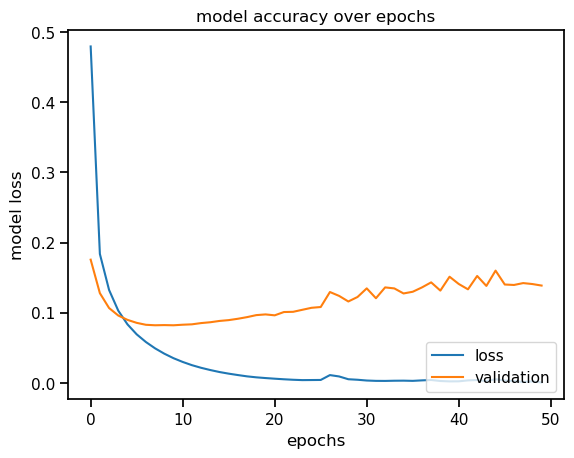

In [22]:
# plot the loss (error) over training epochs (iterations)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label= 'validation')
plt.title('model accuracy over epochs')
plt.legend(loc='lower right')

plt.xlabel('epochs')
plt.ylabel('model loss')

plt.show()

#### TODO (4 pts):

Examine the accuracy and loss plots. Given what you see there, **is this model overfit to the training data?** Explain why or why not. Why do we need to plot loss function, when we have accuracy?

> A model is typically overfit to training data when the accuracy score is significantly higher for the training data than the validation data, as this means the model performs significantly better on data that it has been trained on. Here, the model performs at extremely high accuracy (1.0) on training data and at a lower accuracy (0.97) on validation data. This suggests that the model is overfit.
> 
> The loss for training data hovers near 0 after the first 20 rounds, but the loss for validation data drops to 0.8 at its lowest, and actually increases with more epochs. This means that we have around 0.8 - 0.15 errors on validation data; since the discrepancy between the training loss and validation loss is so large, we would call this model overfit. Additionally, since we see error increasing with so many epochs (and the higher variability after epoch 20 on the accuracy plot), if I were to run this model again, I would do so with fewer epochs since adding more rounds didn't improve the model accuracy or loss.
> 
> Overall, I would say this model is overfit to training data. Some remedies for this would be doing a larger train/test split; we only used 10% of the available data for validation, so increasing that proportion to 20% could positively impact validation performance.
> 
> Why do we need to plot the loss function when we have accuracy? Accuracy and loss are not linearly related (that is, loss =/ inaccuracy). Accuracy tells us how often the model is correctly classifying data, in this case, a handwritten number (how often we get 'true positives'). The loss is telling us how often the model is wrong and incorrectly classifying data (how often we get 'false positives'). The model is updating its weights for each unit based on minimizing the loss function, not based on maximizing accuracy. Plotting the loss function allows us to see how often the model is incorrectly classifying data; in this case, the accuracy was near perfect (0.97). If we didn't plot the loss function, we would have no way of knowing that the model incorrectly classifies data outside the training set at a relatively high frequency (~0.15).

#### TODO (4 pts):

Discuss potential ways to enhance generalization to unseen data in an artificial neural network (ANN) like the one we built here. For each method you identify, explain how it relates to how biological neural networks learn from data (experience).

> One way to enhance generalization to unseen data is to use less training data and more validation data (larger validation/training split). The more training data you use to train the model, the more likely it is that the model will find patterns in the noise of the data and become overfit. This can make the model minimize loss very well on that specific dataset, but not very well to out-of-sample data. Of course you need enough data to get meaningful results, but too much data can also be a problem. In biological neural networks, this can refer to supervised learning: if a baby is only exposed to one dataset of cats (say, a grey family cat), they might not be able to correctly classify an orange cat (validation sample) as being a cat, since their brains are "overfit" to the "training data" of the family cat. Training data should look very similar to test data, and training data should be as diverse as possible, in order for the model to recognize diverse kinds of data and perform better on out-of-sample data.
>
> You can also minimize the number of hidden layers and input units per layer to better generalize to unseen data. Similarly, more hidden layers and input units can increase sensitivity to noise. For example, a biological neural network in a baby can use five layers to classify a cat, based on the training data of the grey family cat. Cats are (1) furry, (2), four-legged, (3) grey, (4) have vertical pupils, and (5) meow. If a baby encounters a hairless cat, or a differently colored cat, or a three-legged cat, it won't be able to correctly ID that it is a cat because it has used too many input layers in classifying what a cat is. 
> 

## Great work!

Write your name below and copy this file to `submissions/pset2/` folder.

Note that file name should be the same as the original (`pset2_neural_network.ipynb`).

### Name: Suzanna Semaan